In [133]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing the Dataset

In [134]:
df = pd.read_csv("E:\\Zep\\heart.csv")

In [135]:
#reading first five rows from dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploratory Data Analysis (EDA)

In [136]:
df.shape

(918, 12)

There have 918 rows & 12 columns in our dataset

In [137]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There have not any null or missing values in any columns

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [139]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [140]:
df.duplicated().any()

False

There have no any duplicate values in whole dataset

In [141]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

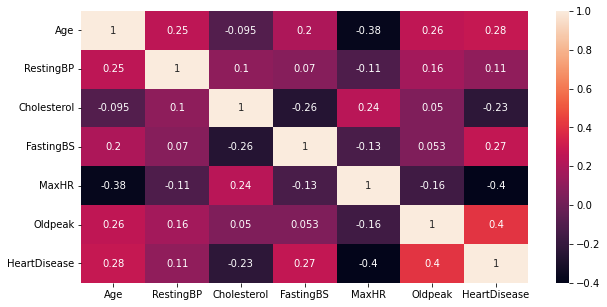

In [142]:
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

We can see there have some positive & negative correlation, for example
* As age increases, heart disease also increases so there have a positive correlation between them
* There have a negative correlation between Fasting Blood Sugar & Cholesterol, maybe both the parameters are not affecting each other directly such as if Fasting Blood Sugar going higher, Cholesterol may goes down or normal


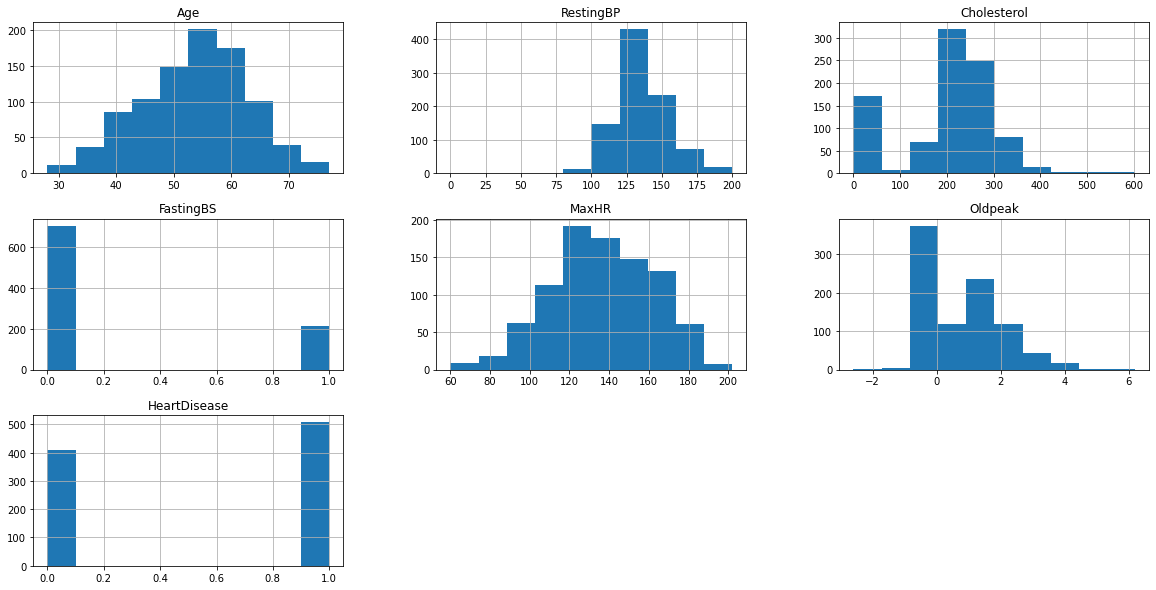

In [143]:
df.hist(figsize=(20,10))
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

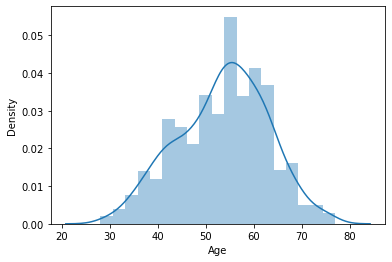

In [144]:
sns.distplot(df['Age'])

By plotting histogram we can say that only Age column is normally distributed  

In [145]:
#counting how many people got affected by Heart Disease

df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In our dataset, the total value of affected people by Heart Disease much higher (508) than the people who are not affected by Heart Disease (410) 

In [146]:
#counting total value sex wise

df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In our dataset, there have total 725 male and 193 female candidates

<AxesSubplot:xlabel='Sex', ylabel='count'>

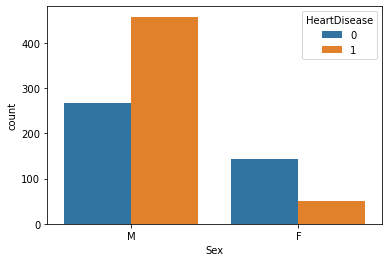

In [147]:
#to find the value sex wise who got affected by Heart Disease 

sns.countplot(x='Sex', hue='HeartDisease', data=df)

Using count plot we can say males are more affected than females by heart disease

In [148]:
#to find max affected people age wise

df[df.HeartDisease == 1].Age.sort_values(ascending = False)

814    77
447    77
541    76
506    75
491    75
       ..
119    34
115    33
294    32
76     32
56     31
Name: Age, Length: 508, dtype: int64

In [149]:
df[df.HeartDisease == 0].Age.sort_values(ascending = True)

208    28
170    29
219    29
829    29
215    30
       ..
336    72
439    74
619    74
556    75
688    76
Name: Age, Length: 410, dtype: int64

In [150]:
df[df.HeartDisease == 1].Age.max()

77

Here we can see that,
* In the age of 77 people got affected more by the heart disease
* On the other hand, who don't have heart disease those age starting from 28

# Interpretation:

From here we can say that as age increases, people got affected more by the heart disease than younger people. 

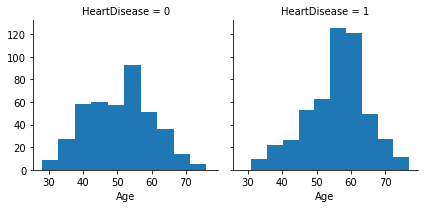

In [151]:
#showing graphically affected & non-affected through age wise

g = sns.FacetGrid(data=df, col='HeartDisease')
g.map(plt.hist, 'Age')

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

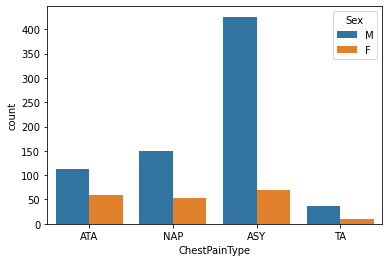

In [152]:
#showing graphically Chest pain type through sex wise

sns.countplot(x='ChestPainType', hue='Sex', data=df)

# Interpretation:

* There have four types of Chest pain, according to our dataset males are hugely affected by the ASY type & lesser affected by the TA type
* For the case of female, this affected rate is very minimum compared with the male. 

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

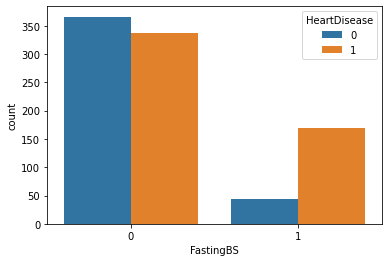

In [153]:
#showing graphically FastingBS
sns.countplot(x='FastingBS', hue='HeartDisease', data=df)

According to our dataset who has FastingBS they are lesser affected by the heart disease, and who has not FastingBS they affected in high amounts by heart disease

In [154]:
#Cholesterol with heart disease

df[df.HeartDisease == 1].Cholesterol.value_counts()

0      152
282      7
216      6
254      6
223      5
      ... 
242      1
126      1
491      1
355      1
131      1
Name: Cholesterol, Length: 175, dtype: int64

In [155]:
#Cholesterol with sex wise

df.groupby("Sex").Cholesterol.count()

Sex
F    193
M    725
Name: Cholesterol, dtype: int64

Males have more Cholesterol than females

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

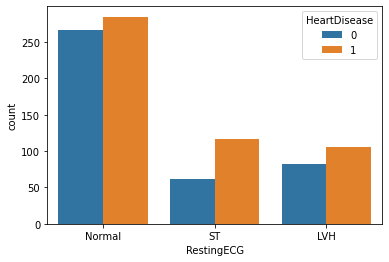

In [156]:
#showing how RestingECG varries w.r.t HeartDisease

sns.countplot(x='RestingECG', hue='HeartDisease', data=df)

Resting ECG are three types. For who have normal Resting ECG those people has affected more in Heart Disease compared with other two ST & LVH

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

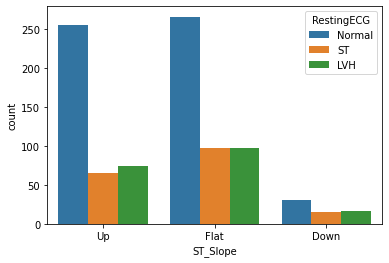

In [157]:
#showing how ST_Slope varries w.r.t RestingECG

sns.countplot(x='ST_Slope', hue='RestingECG', data=df)

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

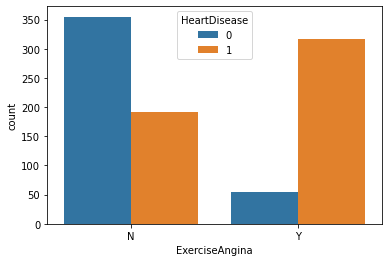

In [158]:
#showing how HeartDisease varries w.r.t ExerciseAngina

sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df)

* Who has ExerciseAngina or who do not exercise, they are affected highly in Heart Disease
* Who doing exercise daily, they are affected in lesser amount

In [159]:
#sorting by age wise who has ExerciseAngina 

df[df.ExerciseAngina == 'Y'].Age.sort_values(ascending = False)

814    77
447    77
556    75
506    75
553    74
       ..
808    35
405    35
696    35
115    33
56     31
Name: Age, Length: 371, dtype: int64

Old people has more ExerciseAngina than youngers

In [160]:
#maximum heart rate value

df.MaxHR.max()

202

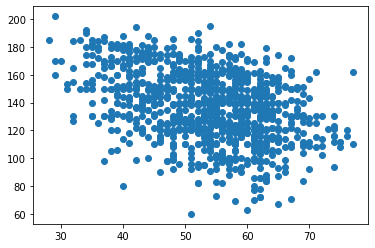

In [161]:
#plotting age wise heart rate

plt.scatter(x='Age',y='MaxHR', data=df)

According to our dataset, we can see that maximum heart rate distributed between the age of 50 to 65

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

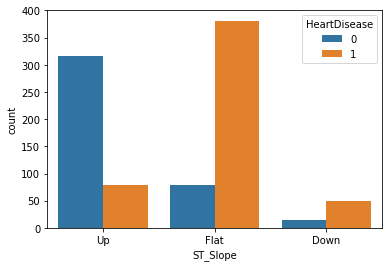

In [162]:
#showing how ST_Slope varries w.r.t HeartDisease

sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)

# Conclusion from the EDA:

1. Age wise we can say aged people (more specifically above 50) needs more awareness by changing their lifestyle, food habits, doing exercise everyday, then only they can prevent this Heart Disease
2. According to our dataset sex wise males are more affected, so males need more aware about heart disease 
3. Who do not have blood sugar that's good thing, but they should keep aware about heart disease, because according to our dataset they are affected more in heart disease 
4. Every person should keep some good habits in their daily life regardless age & sex wise, then only we can prevent heart disease. Because this disease never occurs overnight, this disease occurs depending on the habit of long days

# Data Preprocessing

In [163]:
#finding dummy variables
new_df = pd.get_dummies(df[['ExerciseAngina', 'RestingECG', 'ChestPainType', 'Sex', 'ST_Slope']], drop_first = True)

In [164]:
new_df

,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0
2,0,0,1,1,0,0,1,0,1
3,1,1,0,0,0,0,0,1,0
4,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,1,1,0
914,0,1,0,0,0,0,1,1,0
915,1,1,0,0,0,0,1,1,0
916,0,0,0,1,0,0,0,1,0


In [165]:
#joining dummy variables with the main dataset
df1 = pd.concat([df, new_df], axis=1)

In [166]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,HeartDisease,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,ST_Slope_Flat,ST_Slope_Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,0,1,0,1,0,0,1,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,1,0,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,1,1,0,0,1,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,1,1,1,0,0,0,0,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,...,1,0,1,0,0,0,1,1,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,...,1,0,1,0,0,0,0,1,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,...,1,1,1,0,0,0,0,1,1,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,...,1,0,0,0,1,0,0,0,1,0


In [167]:
#create a new dataset with required variables to train
df2 = df1[['Sex_M', 'Age', 'MaxHR', 'RestingBP', 'Cholesterol', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'ExerciseAngina_Y', 'RestingECG_Normal', 'RestingECG_ST', 'Oldpeak', 'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']]

In [168]:
df2

,Sex_M,Age,MaxHR,RestingBP,Cholesterol,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,Oldpeak,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,1,40,172,140,289,1,0,0,0,1,0,0.0,0,1,0
1,0,49,156,160,180,0,1,0,0,1,0,1.0,1,0,1
2,1,37,98,130,283,1,0,0,0,0,1,0.0,0,1,0
3,0,48,108,138,214,0,0,0,1,1,0,1.5,1,0,1
4,1,54,122,150,195,0,1,0,0,1,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,45,132,110,264,0,0,1,0,1,0,1.2,1,0,1
914,1,68,141,144,193,0,0,0,0,1,0,3.4,1,0,1
915,1,57,115,130,131,0,0,0,1,1,0,1.2,1,0,1
916,0,57,174,130,236,1,0,0,0,0,0,0.0,1,0,1


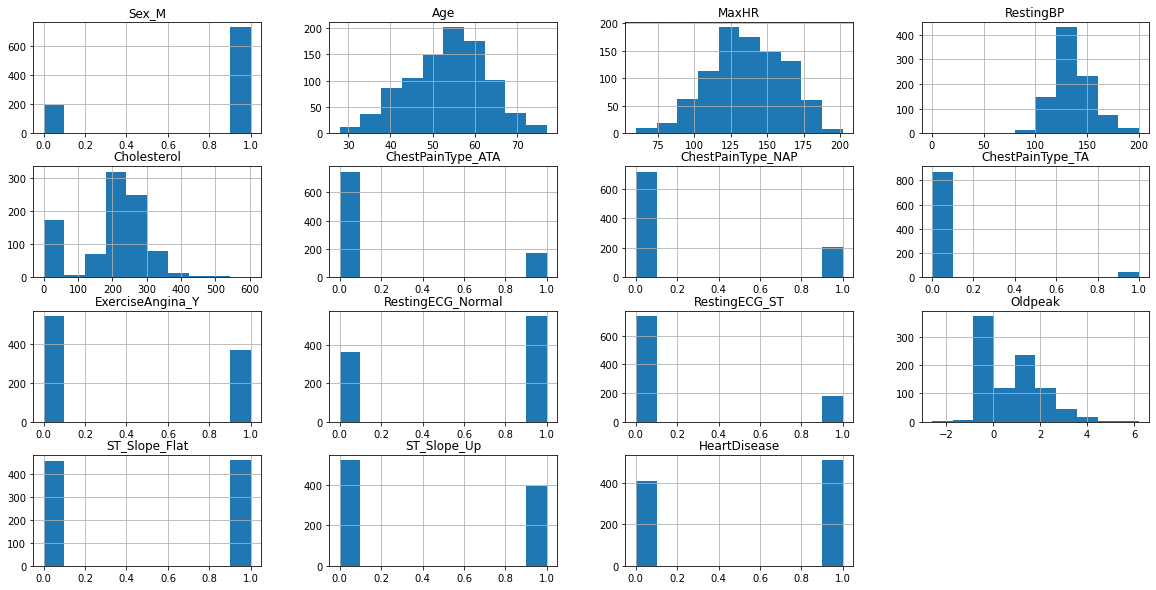

In [169]:
df2.hist(figsize=(20,10))
plt.show()

In [170]:
X = df2[['Sex_M', 'Age', 'MaxHR', 'RestingBP', 'Cholesterol', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'ExerciseAngina_Y', 'RestingECG_Normal', 'RestingECG_ST', 'Oldpeak', 'ST_Slope_Flat', 'ST_Slope_Up']]
y = df2[['HeartDisease']]

# Features Scaling

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
scaler = MinMaxScaler()

In [173]:
new = df2.select_dtypes(include="float64")

In [174]:
new_scaler = scaler.fit_transform(df2)

In [175]:
new_df = pd.DataFrame(new_scaler,columns=df2.columns)

In [176]:
new_df

,Sex_M,Age,MaxHR,RestingBP,Cholesterol,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,Oldpeak,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,1.0,0.244898,0.788732,0.70,0.479270,1.0,0.0,0.0,0.0,1.0,0.0,0.295455,0.0,1.0,0.0
1,0.0,0.428571,0.676056,0.80,0.298507,0.0,1.0,0.0,0.0,1.0,0.0,0.409091,1.0,0.0,1.0
2,1.0,0.183673,0.267606,0.65,0.469320,1.0,0.0,0.0,0.0,0.0,1.0,0.295455,0.0,1.0,0.0
3,0.0,0.408163,0.338028,0.69,0.354892,0.0,0.0,0.0,1.0,1.0,0.0,0.465909,1.0,0.0,1.0
4,1.0,0.530612,0.436620,0.75,0.323383,0.0,1.0,0.0,0.0,1.0,0.0,0.295455,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,0.346939,0.507042,0.55,0.437811,0.0,0.0,1.0,0.0,1.0,0.0,0.431818,1.0,0.0,1.0
914,1.0,0.816327,0.570423,0.72,0.320066,0.0,0.0,0.0,0.0,1.0,0.0,0.681818,1.0,0.0,1.0
915,1.0,0.591837,0.387324,0.65,0.217247,0.0,0.0,0.0,1.0,1.0,0.0,0.431818,1.0,0.0,1.0
916,0.0,0.591837,0.802817,0.65,0.391376,1.0,0.0,0.0,0.0,0.0,0.0,0.295455,1.0,0.0,1.0


# Train Test Spliting

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [179]:
X_train.shape

(734, 14)

In [180]:
X_test.shape

(184, 14)

# Model Building

# K Nearest Neighbor

In [181]:
#importing K Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report

In [182]:
#fitting data into K Nearest Neighbour Classifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [183]:
#class prediction of y
y_pred = KNN.predict(X_test)
y_train_pred_KNN = KNN.predict(X_train)
y_pred_KNN=KNN.predict(X_test)

In [184]:
#getting all scores for XG Boosting Classifier
train_accuracy_KNN= round(accuracy_score(y_train_pred_KNN,y_train), 3)
accuracy_KNN = round(accuracy_score(y_pred_KNN,y_test), 3)
precision_score_KNN = round(precision_score(y_pred_KNN,y_test), 3)
recall_score_KNN = round(recall_score(y_pred_KNN,y_test), 3)
f1_score_KNN = round(f1_score(y_pred_KNN,y_test), 3)
roc_score_KNN = round(roc_auc_score(y_pred_KNN,y_test), 3)

print("The accuracy on train data is ", train_accuracy_KNN)
print("The accuracy on test data is ", accuracy_KNN)
print("The precision on test data is ", precision_score_KNN)
print("The recall on test data is ", recall_score_KNN)
print("The f1 on test data is ", f1_score_KNN)
print("The roc_score on test data is ", roc_score_KNN)

The accuracy on train data is  0.82
The accuracy on test data is  0.652
The precision on test data is  0.695
The recall on test data is  0.695
The f1 on test data is  0.695
The roc_score on test data is  0.645


In [185]:
# Get the confusion matrix for decision tree classifier
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))

[[47 32]
 [32 73]]


In [186]:
# Get classification_report for K Nearest Neighbours classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        79
           1       0.70      0.70      0.70       105

    accuracy                           0.65       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.65      0.65      0.65       184



# Decision Tree

In [187]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [188]:
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [189]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [190]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.783
The precision on test data is  0.79
The recall on test data is  0.822
The f1 on test data is  0.806
The roc_score on test data is  0.778


In [191]:
# Get classification_report for decision tree classifier
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        79
           1       0.82      0.79      0.81       105

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



In [192]:
# Get the confusion matrix for decision tree classifier
print(confusion_matrix(y_test,y_pred_dtc))

[[61 18]
 [22 83]]


# Random Forest Classification

In [193]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [194]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

C:\Users\user\AppData\Local\Temp/ipykernel_11584/2196137390.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50)

In [195]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [196]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.848
The precision on test data is  0.857
The recall on test data is  0.874
The f1 on test data is  0.865
The roc_score on test data is  0.844


In [197]:
# Get the confusion matrix for Random Forest Classifier
print(confusion_matrix(y_test,y_pred_rfc))

[[66 13]
 [15 90]]


In [198]:
# Get the classification_report for Random Forest Classifier
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        79
           1       0.87      0.86      0.87       105

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



# Logistic Regression

In [199]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression

In [200]:
#fitting data into Logistic Regression
logi = LogisticRegression(fit_intercept=True, max_iter=10000)
logi.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=10000)

In [201]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [202]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.871
The accuracy on test data is  0.826
The precision on test data is  0.848
The recall on test data is  0.848
The f1 on test data is  0.848
The roc_score on test data is  0.823


In [203]:
# Get the confusion matrix
print(confusion_matrix(y_test, y_pred_logi))

[[63 16]
 [16 89]]


In [204]:
# Get the classification_report
print(classification_report(y_test, y_pred_logi))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        79
           1       0.85      0.85      0.85       105

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



Text(0, 0.5, 'HeartDisease')

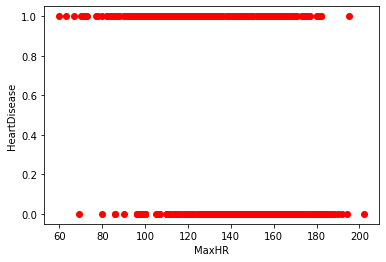

In [205]:
plt.scatter(df.MaxHR,df.HeartDisease, color = 'r', marker = 'o' )
plt.xlabel('MaxHR')
plt.ylabel('HeartDisease')

# Support Vector Machine

In [206]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [207]:
#fitting data into Support Vector Classifier
clf=SVC(probability=True)
clf.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(probability=True)

In [208]:
#class prediction of y
y_pred_svm=clf.predict(X_test)
y_train_pred_svm=clf.predict(X_train)

In [209]:
#getting all scores for Support Vector Classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm,y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm,y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm,y_test), 3)
roc_score_svm = round(roc_auc_score(y_pred_svm,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.737
The accuracy on test data is  0.658
The precision on test data is  0.676
The recall on test data is  0.71
The f1 on test data is  0.693
The roc_score on test data is  0.653


In [210]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61        79
           1       0.71      0.68      0.69       105

    accuracy                           0.66       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.66      0.66      0.66       184



# Gradient Boosting

In [211]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [212]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(random_state=42)

In [213]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [214]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.935
The accuracy on test data is  0.87
The precision on test data is  0.895
The recall on test data is  0.879
The f1 on test data is  0.887
The roc_score on test data is  0.868


In [215]:
# Get the confusion matrix for Gradient Boosting Classifier
print(confusion_matrix(y_test, y_pred_gbc))

[[66 13]
 [11 94]]


In [216]:
# Get the classification_report for Gradient Boosting Classifier
print(classification_report(y_test,  y_pred_gbc))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        79
           1       0.88      0.90      0.89       105

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



# XG Boosting

In [217]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [218]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [219]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [220]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  1.0
The accuracy on test data is  0.837
The precision on test data is  0.838
The recall on test data is  0.871
The f1 on test data is  0.854
The roc_score on test data is  0.833


In [221]:
# Get the confusion matrix for XG Boosting Classifier
print(confusion_matrix(y_test, y_pred_xgb ))

[[66 13]
 [17 88]]


In [222]:
# Get the classification_report for XG Boosting Classifier
print(classification_report(y_test,  y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.84      0.81        79
           1       0.87      0.84      0.85       105

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



# Model Comparision

In [223]:
all_classifiers = ['K Nearest Neighbor', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_KNN, train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_KNN, accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_svm, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_KNN, precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_svm, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_KNN, recall_score_logi, recall_score_dtc, recall_score_rfc, recall_score_svm, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_KNN, f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_svm, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_KNN, roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_svm, roc_score_gbc, roc_score_xgb]

In [224]:
compare_df = pd.DataFrame({'Classifier':all_classifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 score': all_f1_score, 'Accuracy': all_auc_score})

In [225]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 score,Accuracy
0,K Nearest Neighbor,0.820,0.652,0.695,0.695,0.695,0.645
1,Logistic Regression,0.871,0.826,0.848,0.848,0.848,0.823
2,Decision Tree,1.000,0.783,0.790,0.822,0.806,0.778
3,Random Forest,0.999,0.848,0.857,0.874,0.865,0.844
4,SVM,0.737,0.658,0.676,0.710,0.693,0.653
5,Gradient Boosting,0.935,0.870,0.895,0.879,0.887,0.868
6,XG Boosting,1.000,0.837,0.838,0.871,0.854,0.833


In [226]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 score,Accuracy
5,Gradient Boosting,0.935,0.870,0.895,0.879,0.887,0.868
3,Random Forest,0.999,0.848,0.857,0.874,0.865,0.844
6,XG Boosting,1.000,0.837,0.838,0.871,0.854,0.833
1,Logistic Regression,0.871,0.826,0.848,0.848,0.848,0.823
2,Decision Tree,1.000,0.783,0.790,0.822,0.806,0.778
4,SVM,0.737,0.658,0.676,0.710,0.693,0.653
0,K Nearest Neighbor,0.820,0.652,0.695,0.695,0.695,0.645


*Here we can see that Gradient Boosting classifier shows highest test accuracy and F1 score.*

# Combined ROC curve for all the models

In [227]:
#importing roc curve
from sklearn.metrics import roc_curve

In [228]:
#probabilty prediction of y for all model
y_pred_proba_KNN = KNN.predict_proba(X_test)[:,1]
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_clf = clf.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

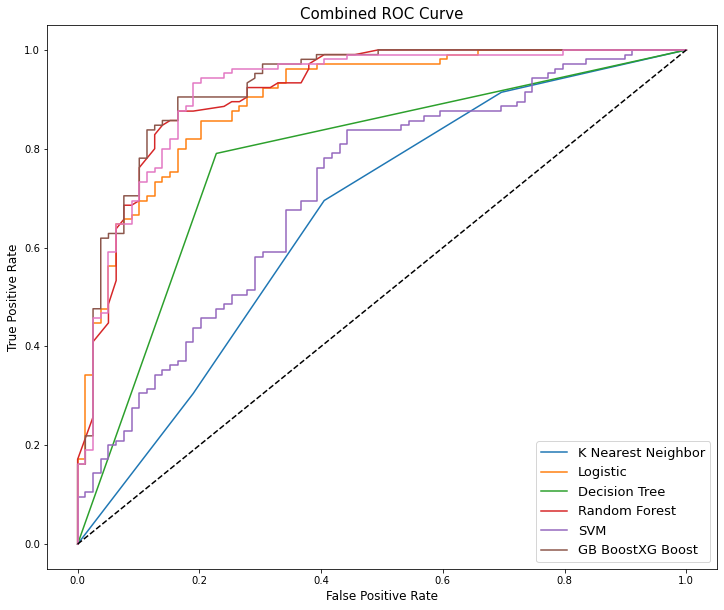

In [229]:
fig = plt.figure(figsize=(12,10)) 

fpr_KNN, trp_KNN, _KNN = roc_curve(y_test, y_pred_proba_KNN)
fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_svm, tpr_svm, _svm = roc_curve(y_test,  y_pred_proba_clf)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_KNN, trp_KNN)
plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["K Nearest Neighbor", "Logistic", "Decision Tree", "Random Forest", "SVM", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

# Cross Validation & Hyperparameter Tuning

In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Gradient Boosting

In [231]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [100,150,200]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [232]:
# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=1, max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=1, max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.0s
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.25, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.25, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.0s
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=50, min_samples_split=200, n_estimators=150; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=1, max_depth=30, min_samples_leaf=50, min_samples_split=200, n_estimators=150; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END learning_rate=0.5, max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

[CV] END learning_rate=0.01, max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30, min_samples_leaf=40, min_samples_split=200, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30, min_samples_leaf=40, min_samples_split=200, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

[CV] END learning_rate=0.1, max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [100, 150, 200],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [233]:
gbc_grid.best_estimator_

GradientBoostingClassifier(max_depth=10, min_samples_leaf=40,
                           min_samples_split=150, random_state=42)

In [234]:
gbc_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 150,
 'min_samples_leaf': 40,
 'max_depth': 10,
 'learning_rate': 0.1}

In [235]:
gbc_optimal_model = gbc_grid.best_estimator_

In [236]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_test)[:,1]

In [237]:
#getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc_grid)
print("The accuracy on test data is ", accuracy_gbc_grid)
print("The precision on test data is ", precision_score_gbc_grid)
print("The recall on test data is ", recall_score_gbc_grid)
print("The f1 on test data is ", f1_score_gbc_grid)
print("The auc on test data is ", auc_gbc_grid)

The accuracy on train data is  0.944
The accuracy on test data is  0.864
The precision on test data is  0.876
The recall on test data is  0.885
The f1 on test data is  0.88
The auc on test data is  0.861


In [238]:
# Get the confusion matrices for train and test
train_cm_gbc_grid = confusion_matrix(y_train,y_train_pred_gbc_grid)
test_cm_gbc_grid = confusion_matrix(y_test,y_pred_gbc_grid )

In [239]:
train_cm_gbc_grid

array([[302,  29],
       [ 12, 391]], dtype=int64)

In [240]:
test_cm_gbc_grid

array([[67, 12],
       [13, 92]], dtype=int64)

# Conclusion:

I have applied seven different types of classification algorithm on my given dataset to know which algorithm good fit for our dataset & gives us the best accuracy. Before applying Cross validation and hyperparameter tuning Gradient Boosting shows highest test accuracy score of 0.870, F1 score is 0.887 and Accuracy is 0.868, but after applying Cross validation and hyperparameter tuning on the Gradient Boosting algorithm it gives test accuracy score of 0.864, F1 score is 0.88 and Accuracy is  0.861 which is almost same than before. As we know that Cross validation and hyperparameter tuning certainly reduces chances of overfitting and also increases performance of model. So we can conclude that before tunning our model worked well so here no needed to apply tuning as such.